# Preface

## Objective and Approach

**Goal:** By the end of the book you should be able to implement programs capable of learning from data!

Python Frameworks to Use:

* Scikit-Learn: Easy to use, entry point to learning ML
* TensorFlow: more complex library, great to train and run very large neural networks (NN)
* Keras: high-level deep learning Application Programming Interface (API), makes it simple to train and run NN, comes with TensorFlow


All code examples are already provided online at https://github.com/ageron/handson-ml3, as jupyter notebooks. This is just a personal repository to play with the code and summarize the book for myself.

Prerequisites:

* NumPy
* Pandas
* Matplotlib
* Linear Algebra
* Differential Calculus

If not familiar, have a look at https://homl.info/tutorials. The book is divided into two parts: 
1. The Fundamentals of Machine Learning (Scikit-Learn), and 
2. Neural Networks and Deep Learning (TensorFlow+Keras). 

## Other Resources

* Andrew Ng's ML course on Coursera: https://www.coursera.org/learn/machine-learning
* Scikit-Learn's User Guide: https://scikit-learn.org/stable/user_guide.html
* Interactive Tutorials: https://www.dataquest.io
* ML blogs: https://www.quora.com/What-are-the-best-artificial-intelligence-blogs-newsletters
* ML competitions: https://www.kaggle.com

# Chapter 1 - The Machine Learning Landscape

This notebook follows the first chapter and plays with the examples given in the book. I will also try to answer the questions in the book that are asked to the reader.

## Prerequisites to run our code

Make sure we use the required python version or above. Note to myself: I am using the system version of python. 

In [1]:
import sys
assert sys.version_info >= (3, 7)

Import essential packages:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Use same plot settings as in the book:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Make this notebook's output stable across runs, we choose a specific random seed:

In [4]:
import numpy as np

np.random.seed(42)

## Theory

### Machine Learning in a Nutshell

Machine Learning is the science (and art) of programming computers so they can learn from data. It is the "field of study that gives computers the ability to learn without being explicitly programmed" (Arthur Samuel, 1959).

ML system:

* *Training set/data*: Examples that the system uses to learn, each example is called a 'training instance/sample'
* *Model*: ML system part that learns and makes predictions, e.g. NN, random forests

Usual advantages of ML:
* No fine-tuning or long list of rules: program can be shorter, be easier to maintain, be more accurate compared to classical computer programs
* automatically adapts to changes (fluctuating environments) compared to classical computer programs
* Complex problems that have no known algorithm, e.g. speech recognition
* can help humans learn by identifying best predictors for tasks and reveal correlations $\to$ Discover hidden patterns in big data (Data Mining)

### Types of Machine Learning Systems

Classify into categories dependend on:
* How are they supervised? Examples: Supervised, unsupervised, semi-supervised, self-supervised, and others
* Learning process: Online vs batch learning
* Instance vs. model-based learning: compare new data points to known data points, or detecting patterns in training data and building predictive model

#### Training Supervision

We will discuss: Supervised learning, unsupervised learning, self-supervised learning, semi-supervised learning, and reinforcement learning

##### Supervised Learning

In supervised learning, the training set for the algorithm is *labeled* (right/wrong, cats/dogs, spam/ham, ...). As already can be guessed from the label examples, classification is a typical supervised learning task. Another example is to predict a *target* numeric value (e.g. price) given some features (age, brand, etc). This task is called regression.

Typical tasks summarised:
* Classification (commonly using labels)
* Regression (commonly using targets)

##### Unsupervised Learning

In unsupervised learning, the training data is unlabeled. For examples, if you like to sort a lot of data into groups (*clustering*), or even further into sub-groups (*hierarchical clustering*). Another example are *visualisation algorithms* where you would like to find representations of complex data for plotting them easier. Closely related to that is *dimensionality reduction* where the data is simplified, for example by merging correlated features into one (feature extraction).

Tip: It might be helpful to use a dimensionality reduction algorithm before feeding it to another ML algorithm, to save disk space, run faster, and maybe even perform better.

*Anomaly detection* says if a new instance is "normal" (like the vast majority of training data) or is likely an anomaly/outlier (rare in data, or not in data). This can be used to remove outliers before using another ML algorithm. Similar is *novelty detection*. This requires very "clean" data and detects new instances that are different from all instances in the training data.

*Association rule learning* discovers interesting relations between attributes in large data sets.

Typical tasks summarised:
* Clustering, hierarchical clustering
* Visualisation
* Dimensionality reduction
* Anomaly detection
* Novelty detection
* Association rule learning

##### Semi-supervised Learning

Semi-supervised Learning algorithms are able to deal with data that is only partially labeled. This can be beneficial since labeling is time-consuming and costly. For example if you have a large photo collection, the unsupervised part of the algorithm might cluster pictures based on who is in there. Once you give a label (name) to all people, the algorithm can name everyone in every picture.
So mostly it is a combinational of unsupervised+supervised algorithms. Once the data is all labeled, a supervised algorithm can take over.

##### Self-supervised Learning

The task is to generate a fully labeled dataset from a fully unlabeled one. For example, damaged or masked images (unlabeled) should recover the original image (labeled targets). This can be also used to categorize data since the algorithm should be able to learn which features to add for a certain category. This is called *Transfer Learning*.

Question: Why is it called self-supervised learning when it is using labels in the training? Some might even consider it unsupervised learning since it deals with fully unlabeled datasets. But self-supervised learning uses (generated) labels during training, so is supervised in that regard. 

Summary: 
* unsupervised learning generally deals with clustering, dimensionality reduction, anomaly detection
* self-supervised learning focuses on same tasks as supervised learning: classification, regression.

##### Reinforcement Learning

The learning system is called an agent which can observe the environment, select and perform actions, and get rewards or penalties in return. It is learning a strategy (policy) to only receive rewards. Examples are robots.

#### Batch vs. Online Learning

Does the machine learning system learn incrementally from a stream of incoming data or offline in batches?

##### Batch learning
In batch learning, the system must be trained using all available data. First the system is trained offline (*offline learning*) which will take a lot of time and computing resources, then it is launched into production and runs without learning more. A negative effect of batch learning is that the model's performance tends to decay slowly over time (*model rot/ data drift*). Therefore, it has to be retrained on up-to-date data+the old data. 

Note: For image recognition models have to be retrained not neccessarily because the objects change (e.g. cats and dogs) but the images change in format, sharpness, brightness, size ratios etc...

##### Online learning
A better option often to process large, continuously increasing and changing data sets and include them in your model is online learning! Here, you train the system incrementally/ on the fly by feeding it data instances either individually or in small groups called *mini-batches*. Online learning is particuarly advantageous for extremely rapidly changing data (e.g. stock market) and limited resources (e.g. trained on your phone).

Technical details:
* *out-of-core learning*: If you train on huge datasets that cannot fit one machine's main memory (out-of-core learning), the data can be chopped into pieces and trained step by step. Out-of-core learning is usually done offline, so think of it more as incremental learning.
* *Learning rate*: An important parameter of online learning is the *learning rate* which tells you how rapidly your system will adapt to new data, but it will also tend to quickly forget old data if the learning rate is high. With a slow learning rate, your system will learn more slowly, but will also be less sensitive to noise in the new data or sequences of nonrepresentative data points (outliers).
* *Monitoring* of the system: If it's a live system and a lot of bad data is fed to the system (spam, bugs), you need to monitor the system and switch learning off if you detect a drop in performance. With an anomaly detection algorithm, you can additionally react to abnormal data immediately.


#### Instance-Based Versus Model-Based Learning

Most machine learning tasks are about making predictions for examples they've never seen before based on data that they're trained on. There are two main approaches to how systems generalize to new instances:

* *Instance-based learning* requires a measure of similarity to determine how much two instances have in common. Here, the system learns the data examples by heart and compares new examples to the learned examples.
* *Model-based learning* generalizes from a set of examples by building a model of these examples. Model-based learning is executed in the following steps:
    1. Study the data
    2. Select a model
    3. Train the model on training data (learning algorithm searches for model parameter values that minimize the cost function)
    4. Apply the model to make predictions on new cases (inference)

###### Example for a model-based approach
You want to know if money makes people happy. So you compare the gross domestic product (GDP) per capita of countries and the Life satisfaction index. 

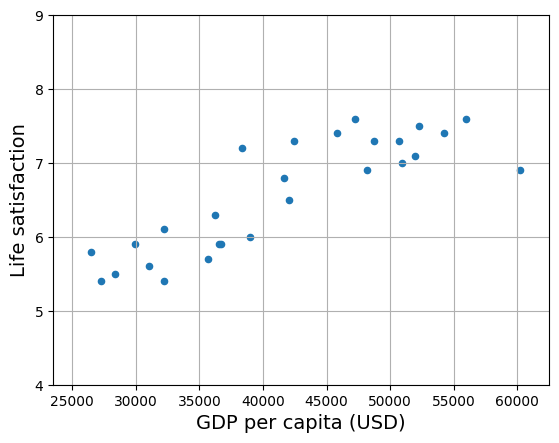

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

Step by step procedure for model-based learning:
#### 1. Data Study: 

Taking a look at the data, it looks like life satisfaction goes up linearly as the country's GDP per capita increases.

##### 2. Model Selection:

A simple linear model is given by
\begin{align}
{\rm life~satisfaction} =  \theta_0+\theta_1\cdot {\rm GDP/capita}
\end{align}
with two parameters $\theta_0$ and $\theta_1$. This is a model-based approach.

##### 3. Model Training:

In [6]:
from IPython.display import display, Math
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

intercept = model.intercept_.item()
coeff = model.coef_.item()
#Model parameters after the fit:
print("### Fit Results ###")
display(Math(r'\theta_0: {:.4f}'.format(intercept)))
display(Math(r'\theta_1: {:.2e}'.format(model.coef_.item())))

### Fit Results ###


<IPython.core.display.Math object>

<IPython.core.display.Math object>

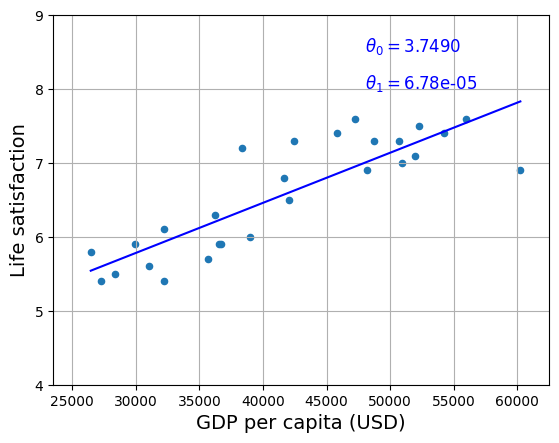

In [7]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
w1, w2 = intercept, coeff
plt.plot(X, w1 + w2 * X, "b")
plt.text(48_000, 8.5, r'$\theta_0 = ${:.4f}'.format(intercept), color="b")
plt.text(48_000, 8.0, r'$\theta_1 = ${:.2e}'.format(coeff), color="b")
plt.show()

##### 4. Model Predictions on new cases:

As an example, we would like to know how happy Cypriots are, just by looking up Cyprus's GDP per capita:

In [8]:
# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]

[[6.30165767]]


If we had used an instance-based learning algorithm, the data tells us that Israel has the closest GDP per capita to Cyprus with a life life satisfaction of 7.2, so we would have predicdted 7.2 for Cyprus. Taking the 3 closest countries (Israel, Lithuania, Slovenia) and averaging them would give 6.33. This simple algorithm is called 'k-nearest neighbors' regression (in our example k=3). Let's quickly try this out:

###### Alternative Model Training:

with 'k-nearest neighbors' regression. This is an instance-based approach.

In [9]:
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor(n_neighbors=3)

In [10]:
# Train the model
model2.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

##### Alternative Model Prediction:

In [11]:
# Make a prediction for Cyprus
cyprus_gdp_per_capita = 37_655.2
X_new = [[cyprus_gdp_per_capita]]  # Cyprus' GDP per capita in 2020
cyprus_predicted_life_satisfaction = model2.predict(X_new).item()
print(cyprus_predicted_life_satisfaction) # outputs [[6.33333333]]

6.333333333333333


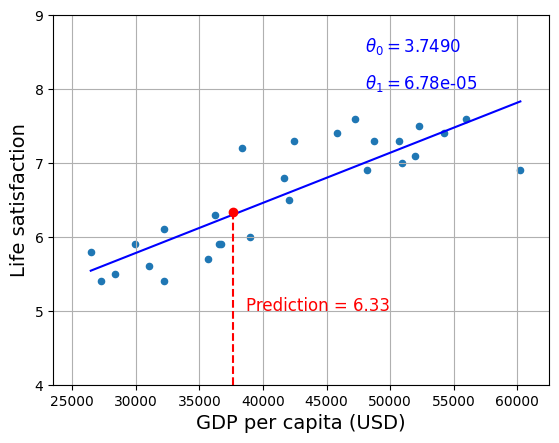

In [12]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
w1, w2 = intercept, coeff
plt.plot(X, w1 + w2 * X, "b")
plt.text(48_000, 8.5, r'$\theta_0 = ${:.4f}'.format(intercept), color="b")
plt.text(48_000, 8.0, r'$\theta_1 = ${:.2e}'.format(coeff), color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [4, cyprus_predicted_life_satisfaction], "r--")
plt.text( cyprus_gdp_per_capita+ 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.show()

### Main Challenges of Machine Learning



### Bad Data

##### Insufficient Quantity of Training Data

Even for simple problems, machine learning algorithms need thousands of examples to work properly. More complex problems need millions, unless they can recycle parts of existing models. Two famous papers underline the effectiveness of data. They both state that given enough data, very different machine learning algorithms perform almost identically well on a complex problem.

https://dl.acm.org/doi/10.3115/1073012.1073017

https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf

##### Nonrepresentative Training Data

No matter if you use instance-based or model-based learning algorithms, to generalize well, it is crucial to have representative training data. For example, the previous data set did not contain any countries with a GDP per capita lower than `$23,500` or higher than `$62,500`. An updated version can be found below

In [13]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [14]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [15]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [16]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [17]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

In [18]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [19]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

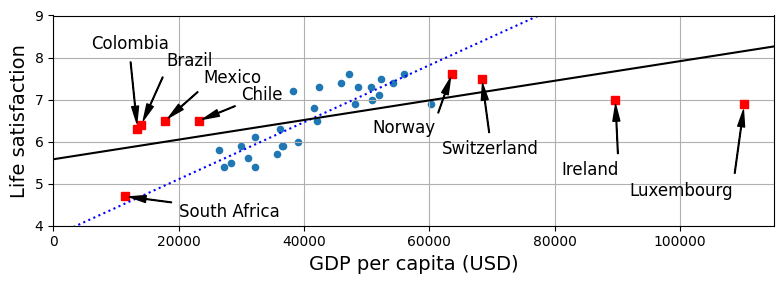

In [20]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, w1 + w2 * X, "b:")

lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, 4, 9])

save_fig('representative_training_data_scatterplot')
plt.show()

As you can see, the old fit (dotted line) is representing the old data well, but does not represent the updated data set well. The old model will perform very poorly for very rich and very poor countries. The solid line is an updated fit to data.

**Takeaway:** It is crucial to use a training set that is representative of the cases you want to generalize to. 

**Challenges:** 
* Sampling noise: Sample is too small $\to$ nonrepresentative given its smallness
* Sampling bias: The sample is very large but flawed. This can easily happen in election polling.

##### Poor-Quality Data

Training data can be of poor quality because of errors, outliers, and noise, which make it harder to detect underlying patterns. Hence, data scientists usually spend significant time cleaning up the training data:
* For outliers, it might help to discard the instance, or fix the error manually.
* When some features are missing in some instances, you might want to ignore these instances, or fill in the missing values, or train a model with and without the feature.

##### Irrelevant Features

"Garbage in, garbage out!": Your system will only learn effectively if the training data contains enough relevant features. *Feature engineering* is the process of coming up with a good set of features to train on:

**Feature engineering:** 
* Feature selection: Selecting the most useful features to train on
* Feature extraction: Combining features to produce more useful ones, for example with a dimensionality reduction algorithm
* Creating new features by gathering data

### Bad model/algorithm

##### Overfitting the Training Data

Overgeneralization is called overfitting in machine learning. This means that the model performs well on the training data but does not generalize well. An example of the above considered data is shown below.

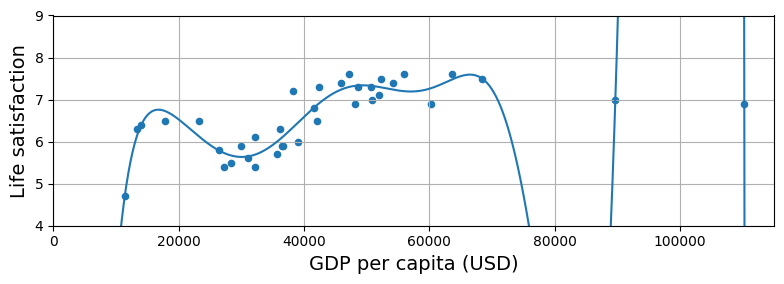

In [21]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, 4, 9])

save_fig('overfitting_model_plot')
plt.show()

This high-degree polynomial model performs very well on the training data than the linear model, but would you trust it? Probably not, since it strongly overfits the data. Complex models (like deep neural networks) can detect subtle patterns in data. But if the training set is noisy, or too small (sampling noise), the model is likely to detect patterns in the noise itself. Your model can also highly prioritize irrelevant features, for example the country names in your training data. Why should letters in a country name tell you anything about the wealth of a country?


**Problem:** Overfitting happens when the model is too complex relative to the amount and noisiness of the training data.

**Possible solutions:**
* Regularization: Simplify model by using model with fewer parameters (e.g. linear model over high-level polynomial model), by reducing the number of attributes in the training data, or by constraining the model.
* Gather more data
* Reduce the noise in the training data (fix data errors and remove outliers)

**Example for Regularization:** The model used earlier has two *degrees of freedom* $\theta_0$ (height) and $\theta_1$ (slope) to adapt to the training data. For $\theta_1=0$, a horizontal line would only move up or down to find the fit function and would end up around the mean. If we allow $\theta_1$ to vary, but in a limited range, the learning algorithm will effectively have somewhere in between one and two degrees of freedom. Goal is to find the right balance between fitting the data perfectly and keeping the model simple enough to generalize.

The following plot shows three models:
1. dotted line: original model trained on the countries represented by circles
2. solid line: model trained with all countries (circles and squares)
3. dashed line: same as first model but with regularization constraint (smaller slope). 

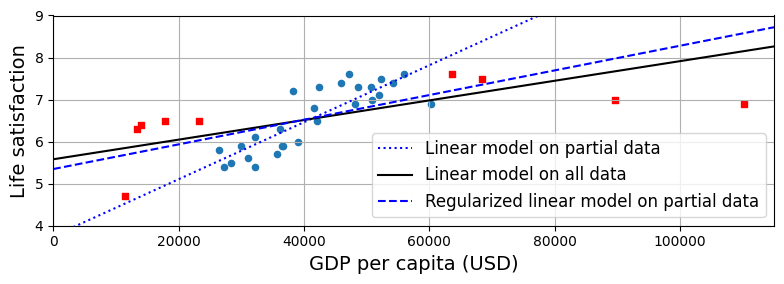

In [26]:
from sklearn.linear_model import Ridge
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, w1 + w2*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, 4, 9])

save_fig('ridge_model_plot')
plt.show()

**Hyperparameters:** A hyperparameter is a parameter of a learning algorithm (not of the model). It controls the amount of regularization to apply during learning. It must be set prior to training and remains constant during training. In the prior example, the hyperparameter was set to a very large value, resulting in an almost flat model, the learning algorithm will not overfit the training data, but it is less likely to find a good solution. 

**Important:** Tuning hyperparameters is an essential part of building a machine learning system (details in the next chapter).

### Underfitting the Training Data

Underfitting occurs when the model is too simple to learn the underlying structure of the data. A linear model for life satisfaction is prone to underfit. The problem can be fixed in the following ways:

* Select a more powerful model, with more parameters.
* Feed better features to the learning algorithm (feature engineering)
* Reduce the constraints on the model, e.g. reducing regularization hyperparameters.

### Big Picture

* **Machine Learning:** Make machines get better at tasks by learning from data, instead of having to explicitly code rules
* **ML systems:** supervised $\leftrightarrow$ unsupervised + semi-supervised, batch $\leftrightarrow$ online, instance-based $\leftrightarrow$ model-based
* **ML project:** Gather data $\to$ Feed training data to learning algorithm. Then: 
    1. model-based: tunes some parameters to fit the model to training set $\to$ make (hopefully) good predictions
    2. instance-based: learns examples by heart and generalizes to new instances by similarity measure
* **Problems:**
    1. Training set: too small, data not representative, noisy, or polluted with irrelevant features
    2. Model: too simple (underfits), or too complex (overfits)


## Testing and Validation

To know how well a model generalizes, you need to apply it to new cases. The best way to do so is splitting your data into two sets:
1. training set: you train your model using the training set. This gives you a training error.
2. test set: you test your model using your test set. This gives you a generalization error ( or out-of-sample error).

**Hint towards overfitting:** If your training error is low, but the generalization error is high, this means that your model is overfitting the training data.

### Hyperparameter Tuning and Model Selection

When choosing between different models, it helps to compare how well they generalize using the test set. 

**Problem:** If you want to apply some regularization to your model to avoid overfitting, you would like to choose a good regularization hyperparameter. In that case, one option is to train several different models using different hyperparameter values and use the one with the lowest generalization error. The problem here is that you chose the model and hyperparameter that works best on that particular test set. 

**Solution:** A common solution is called *holdout validation* where you hold out a part of the training set to evaluate several candidate models and selecdt the best one. This set is called *validation set* (or *development set* or *dev set*). After choosing the model that performs best on the validation set, you take this model and train it on the full training set (including the validation set). Then you evaluate the final model on the test set to get the generalization error. 

This is shown in the following image taken from the book ``Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow`` by Aurélien Géron.

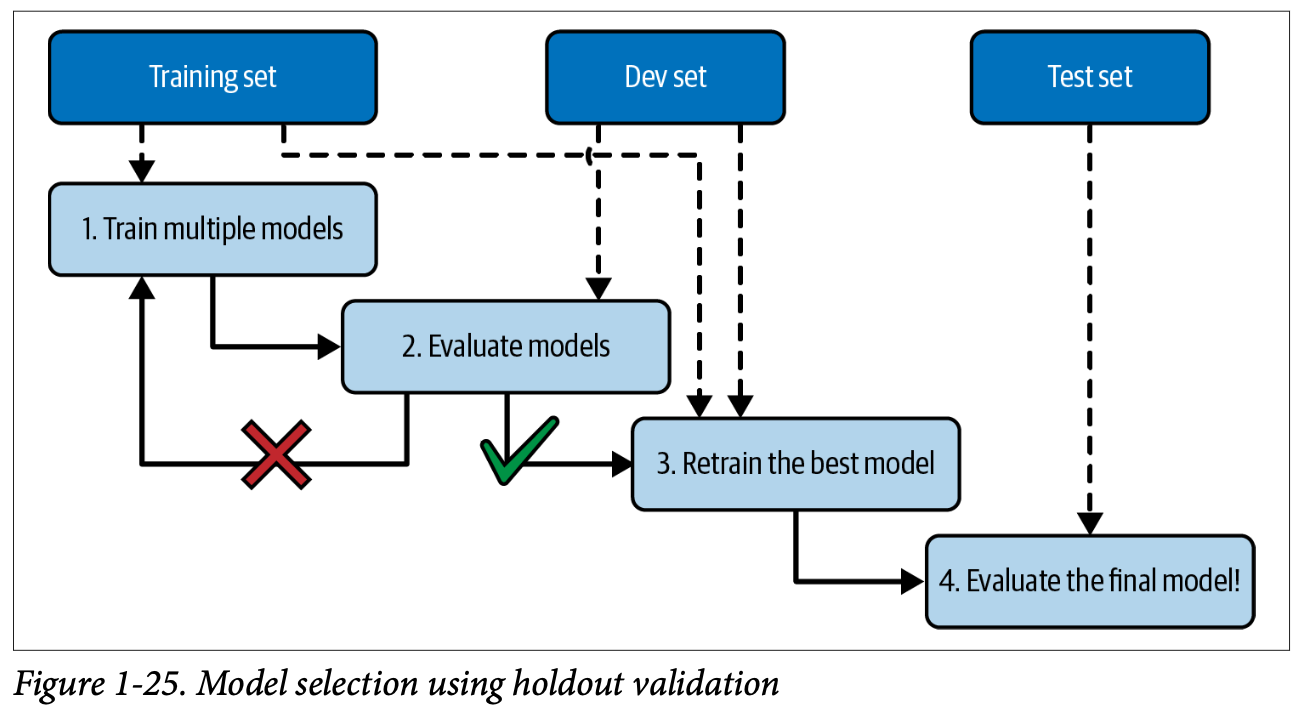

In [1]:
from IPython.display import Image

# Display an image from a file
Image(filename='images/book/model_selection.png')

**Difficulty:* It is important to choose the right size of the validation set:
* too small: model evaluation imprecise
* too large: training set will be much smaller than full training set, so candidate models will be trained on much smaller training set.

**Way out**: Perform repeated *cross-validation* using many small validation sets. Each model is evaluated once per validation set after it is trained on the rest of the data. The average of all evaluations of a model gives a more accurate measure of its performance. Drawback: Training time is multiplied by the number of validation sets.

### Data Mismatch

You always would like to have a large amount of data that is representative of the data that is used in production. In particular, you would like that both the validation set and the test set are as representative as possible. 

**Example:** You create an app that determines the species of flowers based on taken pictures. You have a data set of millions of flowers from the web, but only a 1000 representative pictures taken by the app itself. You can split the representative pictures into 500 for the validation set, and 500 for the test set. If you get a poor performance on the validation set after training the model on web pictures, you don't know if it's because of overfitting, or just a mismatch between web pictures and mobile app pictures. 

**Solution:** Yet another set called *train-dev set*. When real data is scarce, you train the model on the training set, and evaluate it on the train-dev set. If the model performs poorly, it must be overfitting, so you should simplify or regularize the model, get more training data, and clean up the training data. If it performs well, you can evaluate the model on the dev set. If it performs poorly, then the problem must be data mismatch. You can preprocess the web images to make them look more like pictures taken by the mobile app, and then retrain the model. Once your model performs well on both train-dev and dev set, you can evaluate it one last time on the test set.


### Summary

1. Training set: This is the initial training set, you train your model on. After this training, you start the first round of evaluation.
2. Train-Dev set: The train-dev set can be used to identify and avoid overfitting. If your model performs bad on the train-dev set, it is likely due to overfitting. So simplify or regularize the model, get more training data, and clean up the training data. If it performs well, evaluate your model on the dev/validation set.
3. Dev/validation set: The evaluation on the dev set tells you if there is data mismatch or not. Finally you can train your model on all sets used so far. 
4. Test set: Finally you can evaluate your model on the test set. This gives you the generalization error.

### No Free Lunch Theorem

A model is a simplified representation of the data. By selecting a model, you implicitly make assumptions about the data. But there is no model that is *a priori* guaranteed to work better (no free lunch). The only way to know which model works best is to evaulate them all! This is not very practical and hence, you make some reasonable assumptions about the data and evaluate a few reasonable models, e.g. for simple tasks linear model with regularizations might work, for complex problems evaluating various neural networks might be better.


# Exercises

1. How would you define machine learning?

* My answer: A machine that is learning from data. Practically it is setting up a computer program and giving it the capability to learn from data without explcitly coding rules into the program.

* Book answer: Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.

2. Can you name four types of applications where it shines?

* My answer: 
    1. Data is changing fast $\to$ no time to adapt code to new rules, 
    2. no known code solution available (speech recognition), 
    3. Simplification of code: instead of a long list of rules and fine-tuning, ML might be shorter code and easier to maintain
    4. Data mining: Reveal hidden patterns and correlations, not known by the humand mind before.
    
* Book answer: Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).

3. What is a labeled training set?

* My answer: A labeled training set consists of training instances with labels or target values.

* Book answer: A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.

4. What are the two most common supervised tasks?

* My answer: Classification and Regression

* Book answer: The two most common supervised tasks are regression and classification.

5. Can you name four common unsupervised tasks?

* My answer: Clustering, Visualisation, Anomaly detection, Novelty Detection.

* Book answer: Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.

6. What type of algorithm would you use to allow a robot to walk in various unknown terrains?

* My answer: reinforcement learning

* Book answer: Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains, since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semi-supervised learning problem, but it would be less natural.

7. What type of algorithm would you use to segment your customers into multiple groups?

* My answer: I would use a clustering algorithm based on unsupervised learning if I don't know how to group them. If the groups are known a supervised learning classification algorithm will do the job.

* Book answer: If you don't know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

* My answer: I would frame it as a supervised learning problem. 

* Book answer: Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their labels (spam or not spam).

9. What is an online learning system?

* My answer: An online learning system is a ML system that continuously learns from an incoming stream of data. In contrast, in batch learning a ML system is learning offline in batches before going to production. 

* Book answer: An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.

10. What is out-of-core learning?

* My answer: A step-by-step learning of pieces of the training data incrementally, for example if the training set is too huge to fit the machine's memory. 

* Book answer: Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.

11. What type of algorithm relies on a similarity measure to make predictions?

* My answer: instance-based systems are based on a similarity measure to make predictions. The instance-based algorithm learns the data by heart and compares new instances to the learned instances.

* Book answer: An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.

12. What is the difference between a model parameter and a model hyperparameter?

* My answer: A model parameter is a parameter that will be determined by training to data. The obtained model parameter values should describe the data best given a certain underlying model. A model hyperparameter is set a priori to the training and won't be changed within the training. It can help to constrain the model in certain ways.

* Book answer: A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).

13. What do model-based algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

* My answer: Model-based algorithms are searching for a model based on examples (training data). They are executed in the following steps: 1. Study the data, 2. Choose a model, 3. Train the model, 4. Make predictions. Predictions are made by giving new input to the model and predicting its output.

* Book answer: Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance's features into the model's prediction function, using the parameter values found by the learning algorithm.

14. Can you name four of the main challenges in machine learning?

* My answer: 
    1. Bad data: noisy data, unrepresentative data, unsufficient amount of data, poor-quality data, irrelevant features in data
    2. Bad model: 
        * Underfitting: The model is too simple to describe the underlying structure of the data well. 
        * Overfitting: The model performs well on the training data, but does not generalize well to new data. 
        
* Book answer: Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.

15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

* My answer: This sounds like overfitting. Possible solutions include: 
    1. Regularize the model with hyperparameters
    2. Make sure to have good data: Clean data, Have representative data, Collect more data
    3. Simplify the model
    
* Book answer: If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.

16. What is a test set, and why would you want to use it?

* My answer: A test set serves to test how well a model generalizes to new data. With the test set, a generalization error can be given to the model.

* Book answer: A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.

17. What is the purpose of a validation set?

* My answer: A validation set is used to choose between several possible models before evaluating the generalization error on the test set (or to avoid data mismatch?).

* Book answer: A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.

18. What is the train-dev set, when do you need it, and how do you use it?

* My answer: The train-dev set is used to make sure that overfitting is the reason for poor validation results instead of a data mismatch. After training on the training set, you evaluate the model on the train-dev set. If it performs poorly, you are overfitting. If it performs well, you can evaluate your model on the validation set to see if there is a data mismatch. 

* Book answer: The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that's held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.

19. What can go wrong if you tune hyperparameters using the test set?

* My answer: You might give a model into production that performs worse than you expect. 

* Book answer: If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).